# Week 04 – Other XAI approaches


## set up

Before running this notebook you'll need to run the following commands in your terminal:

```
# navigate to week 4 material
cd <./.../04_otherXAI>

python3.11 -m venv venv_week4

MacOS: source venv_week4/bin/activate  
Windows: venv_week4/Scripts/activate

pip install ipykernel 

python -m ipykernel install --user --name=venv_week4

pip install -r requirements.txt
```

# 1. Symbolic Regression 

In this notebook you will use different approaches to symbolic regression: GPLearn for symbolic regression, and other non-symbolic regression methods (DT and RF), as well as ECSEL (Lumadjeng et al., 2026).

In [1]:
# RUN THIS CELL FIRST. Do not change.

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
import matplotlib.pyplot as plt

First, we create the data used for the methods mentioned above. The code below creates a surfaceplot of all points $(x_1,x_2)$ between -1 and 1 for two features $x_1$ and $x_2$, according to the equation $y_{truth} = x_1^2 - x_2^2 + x_2 - 1$. In the methods below we will try to find an equation that best fits $y_{truth}$. 

1. GPLearn for Symbolic Regression
2. Decision Tree Regression
3. Random Forest Regression

Recall that in case of symbolic regression, the goal is to find an equation. To compare to other non-linear methods, we include Decision Tree (DT) Regression and Random Forest (RF) Regression. However, these methods will not produce an equation, but will simply train a DT or RF that best matches the given data.

### Create surface plot

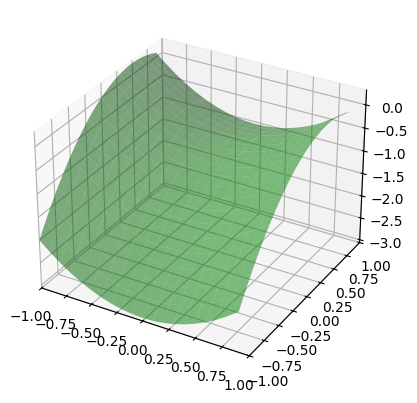

In [2]:
# RUN THIS CELL. Do not change.

# Creating surface plot of y_truth
x1 = np.arange(-1, 1, 1/10.)
x2 = np.arange(-1, 1, 1/10.)
x1, x2 = np.meshgrid(x1, x2)
y_truth = x1**2 - x2**2 + x2 - 1

ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
surf = ax.plot_surface(x1, x2, y_truth, rstride=1, cstride=1,
                       color='green', alpha=0.5)
plt.show()

#### Q1. Suppose a new sample $(x1,x2)$ in $[-1,1]$ comes in. Where whould the predicted output lie in this plot?

...

### Generate synthetic data

We'll now create the actual train and test data to use on GPLearn, DT Regression and RF Regression. The train dataset will consist of a 100 samples. We use $$y = x_1^2 - x_2^2 + x_2 - 1$$. 

Running the cell below shows you the first five samples of all 50 samples. 

In [3]:
# RUN THIS CELL. Do not change.
rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0]**2 - X_train[:, 1]**2 + X_train[:, 1] - 1

train_df = pd.DataFrame({'x1': X_train[:, 0], 'x2': X_train[:, 1], 'y': y_train})
print(train_df.head())

# Testing samples
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0]**2 - X_test[:, 1]**2 + X_test[:, 1] - 1

         x1        x2         y
0  0.097627  0.430379 -0.745316
1  0.205527  0.089766 -0.876050
2 -0.152690  0.291788 -0.770038
3 -0.124826  0.783546 -0.814817
4  0.927326 -0.233117 -0.427528


## 1.1 GPLearn

We first start with training a GPLearn model. Recall that this model performs symbolic regression based on genetic programming. Thus the resulting output is an equation that best fits the dataset above, after performing tree operations based on Darwinian evolution (cross-over, mutation, selection, replication). The output will be given by a set of arithmetic operators: addition, substraction, division and multiplication. 

Examples are `add(x1,3.0)` means $x_1+3$, or `sub(x2,add(x1,3.0))` means $x_2-(x_1+3)$.

In [4]:
# RUN THIS CELL. Do not change.

# Fit SymbolicRegressor
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)

# Generate equation
print(est_gp._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13          458.578        5         0.320666         0.556764     28.62s
   1     9.97          1.70233        5         0.320202         0.624787     18.12s
   2     7.72          1.94456       11         0.239537         0.533148     17.05s
   3     5.41         0.990157        7         0.235676         0.719906     15.01s
   4     4.66         0.894443       11         0.103946         0.103946     13.98s
   5     5.41         0.940242       11         0.060802         0.060802     13.82s
   6     6.78          1.09536       11      0.000781474      0.000781474     12.38s
sub(add(-0.999, X1), mul(sub(X1, X0), add(X0, X1)))


#### Q2. Give the resulting equation and show that GPLearn found the original equation exactly.
Tip: `X0` = x1 and `X1` = x2

...

## 1.2 Other regression methods

We train a Decision Tree Regression model and Random Forest Regression model. Tree Regression methods aim to find a tree that will travel through the branches to end up in a note with the value closest to the target value. For example, given sample a new samle $(x1,x2) = (4.0, 2.0)$. The tree regressor may create decision rules such as `(x1 <= 5.0) and (x2 <= 3.0), then y = 3.5`. The decision rules created should produce output values that closely matches the y-column of our datadet.

In [5]:
# RUN THIS CELL. Do not change.

# Fit Decision Tree and Random Forest regression
est_tree = DecisionTreeRegressor()
est_tree.fit(X_train, y_train)
est_rf = RandomForestRegressor()
est_rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

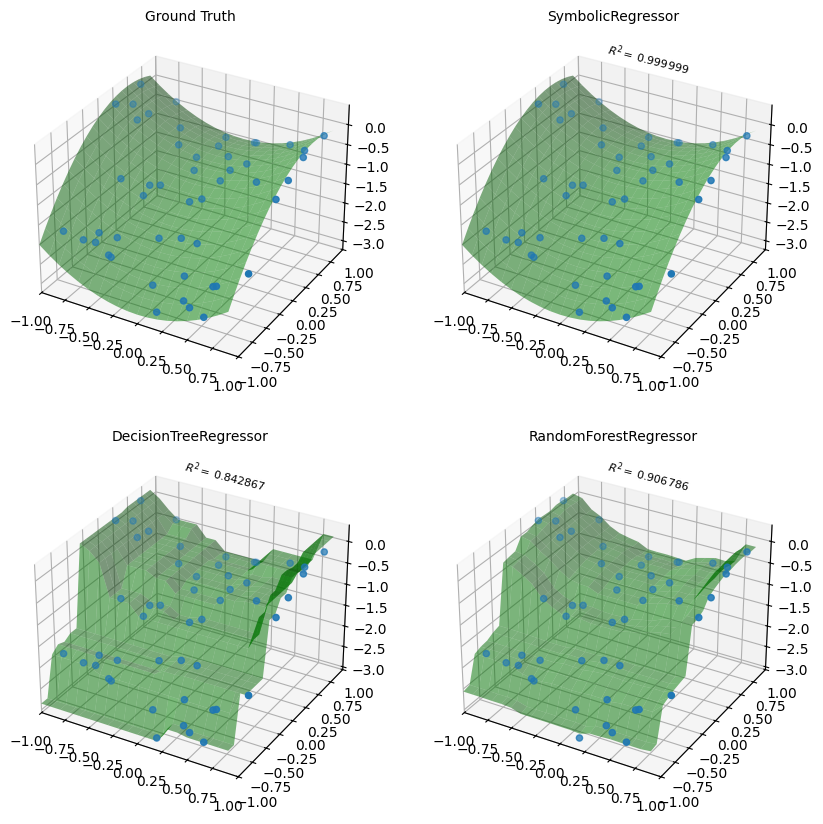

In [6]:
# RUN THIS CELL. Do not change.

y_gp = est_gp.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)
score_gp = est_gp.score(X_test, y_test)
y_tree = est_tree.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)
score_tree = est_tree.score(X_test, y_test)
y_rf = est_rf.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)
score_rf = est_rf.score(X_test, y_test)

fig = plt.figure(figsize=(10, 10))

for i, (y, score, title) in enumerate([(y_truth, None, "Ground Truth"),
                                       (y_gp, score_gp, "SymbolicRegressor"),
                                       (y_tree, score_tree, "DecisionTreeRegressor"),
                                       (y_rf, score_rf, "RandomForestRegressor")]):

    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    surf = ax.plot_surface(x1, x2, y, rstride=1, cstride=1, color='green', alpha=0.5)
    points = ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
    if score is not None:
        score = ax.text(-.7, 1, .2, "$R^2 =\/ %.6f$" % score, 'x', fontsize=8)
    plt.title(title, fontsize = 10)
plt.show()

#### Q3. Which method seems to work best according to the plot? Explain your answer. Is this also what you expected?

...

## 1.3 Explainable Classfication via Signomial Equation Learning (ECSEL)

We will use ECSEL on a small well-known classification dataset Iris. The task here is to distinguish between three types of Iris flowers based on their petals and sepals. Download the dataset from canvas and put it in the datasets folder. The next cells make sure the model is ready to use (imports, data loading, preprocessing, etc.). We compare against other interpretable classification methods Logistic Regressiond (LR) and Explainable Boosting Machine (EBM).

In [7]:
# DO NOT CHANGE

import os
import time
import numpy as np
import pandas as pd
from collections import Counter

import optuna
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss
from sklearn.linear_model import LogisticRegression

from interpret.glassbox import ExplainableBoostingClassifier
from ecsel import SignomialClassifier

In [8]:
# Configuration and hyperparameters

RANDOM_STATE = 42
TEST_SIZE = 0.2
CV_FOLDS = 5
N_TRIALS = 8   # small for classroom speed

SCALER_RANGE = (0.01, 10.01)
scaler = MinMaxScaler(feature_range=SCALER_RANGE)

def suggest_signomial_params(trial):
    return {
        "l1_strength": trial.suggest_float("l1_strength", 1e-4, 5e-3, log=True),
        "batch_size": trial.suggest_categorical("batch_size", [16, 32]),
        "lr": trial.suggest_float("lr", 1e-4, 5e-3, log=True),
        "num_epochs": trial.suggest_int("num_epochs", 300, 700),
        "patience": trial.suggest_categorical("patience", [20, 40]),
        "use_sigmoid": False,
        "random_state": RANDOM_STATE,
        "verbose": False,
    }

In [11]:
# Helper functions for data loading, preprocessing and evaluation
def load_iris_from_csv():
    # Notebook-safe path resolution
    project_root = os.path.abspath("..")
    csv_path = os.path.join(project_root, "datasets", "iris", "iris.csv")

    df = pd.read_csv(csv_path, header=0, sep=";")
    print(f"Loaded iris.csv from {csv_path}")
    print(f"Shape: {df.shape}")

    y_raw = df.iloc[:, -1]
    X_df = df.iloc[:, :-1]

    y = y_raw.astype("category").cat.codes.to_numpy()
    mapping = dict(enumerate(y_raw.astype("category").cat.categories))

    print("Target mapping:", mapping)

    X = X_df.to_numpy(dtype=float)
    feature_names = list(X_df.columns)

    return X, y, feature_names, mapping


def preprocess(X_train, X_test):
    return scaler.fit_transform(X_train), scaler.transform(X_test)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    t0 = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - t0

    t1 = time.time()
    y_pred = model.predict(X_test)
    try:
        y_proba = model.predict_proba(X_test)
    except:
        y_proba = None
    test_time = time.time() - t1

    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("F1:", round(f1_score(y_test, y_pred, average="weighted"), 4))
    print("Precision:", round(precision_score(y_test, y_pred, average="weighted"), 4))
    print("Recall:", round(recall_score(y_test, y_pred, average="weighted"), 4))
    if y_proba is not None:
        print("LogLoss:", round(log_loss(y_test, y_proba), 4))

    print(f"Fit time: {fit_time:.2f}s | Test time: {test_time:.2f}s")
    print("-" * 40)


In [13]:
# Run ECSEL

X, y, feature_names, class_mapping = load_iris_from_csv()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE
)

X_train, X_test = preprocess(X_train, X_test)

print("\n==============================")
print("Logistic Regression")
print("==============================")
lr_model = LogisticRegression(max_iter=500, random_state=RANDOM_STATE)
evaluate_model(lr_model, X_train, X_test, y_train, y_test)

print("\n==============================")
print("Explainable Boosting Machine (EBM)")
print("==============================")
ebm_model = ExplainableBoostingClassifier(
    interactions=0,   # purely additive for interpretability
    max_bins=32,
    random_state=RANDOM_STATE
)
evaluate_model(ebm_model, X_train, X_test, y_train, y_test)

print("\n==============================")
print("SignomialClassifier (Optuna tuned)")
print("==============================")

def objective(trial):
    params = suggest_signomial_params(trial)
    model = SignomialClassifier(**params)

    skf = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    accs = []

    for tr_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train[tr_idx], X_train[val_idx]
        y_tr, y_val = y_train[tr_idx], y_train[val_idx]

        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        accs.append(accuracy_score(y_val, y_pred))

    return np.mean(accs)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=N_TRIALS, show_progress_bar=False)

best_params = study.best_trial.params
best_params.update({
    "use_sigmoid": False,
    "random_state": RANDOM_STATE,
    "verbose": False
})

print("Best CV accuracy:", study.best_value)
print("Best params:", best_params)

best_model = SignomialClassifier(**best_params)
evaluate_model(best_model, X_train, X_test, y_train, y_test)

if hasattr(best_model, "get_learned_formula"):
    print("Learned formula:")
    print(best_model.get_learned_formula(feature_names=feature_names))


Loaded iris.csv from /Users/adialumadjeng/Projects/trustworthy_ai/datasets/iris/iris.csv
Shape: (150, 5)
Target mapping: {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

Logistic Regression
Accuracy: 0.9667
F1: 0.9666
Precision: 0.9697
Recall: 0.9667
LogLoss: 0.0869
Fit time: 0.03s | Test time: 0.00s
----------------------------------------

Explainable Boosting Machine (EBM)


[I 2026-02-24 17:04:55,716] A new study created in memory with name: no-name-6fcca407-5780-4ade-8832-566ce37a81b3


Accuracy: 0.9333
F1: 0.9333
Precision: 0.9333
Recall: 0.9333
LogLoss: 0.2276
Fit time: 1.81s | Test time: 0.00s
----------------------------------------

SignomialClassifier (Optuna tuned)


[I 2026-02-24 17:04:56,892] Trial 0 finished with value: 0.95 and parameters: {'l1_strength': 0.0004118720503092142, 'batch_size': 32, 'lr': 0.001151913119332239, 'num_epochs': 583, 'patience': 20}. Best is trial 0 with value: 0.95.
[I 2026-02-24 17:04:57,994] Trial 1 finished with value: 0.7166666666666667 and parameters: {'l1_strength': 0.00028343817020562743, 'batch_size': 32, 'lr': 0.00013517241547745054, 'num_epochs': 542, 'patience': 40}. Best is trial 0 with value: 0.95.
[I 2026-02-24 17:04:59,174] Trial 2 finished with value: 0.85 and parameters: {'l1_strength': 0.00018952483519987378, 'batch_size': 16, 'lr': 0.00032134169023391397, 'num_epochs': 315, 'patience': 40}. Best is trial 0 with value: 0.95.
[I 2026-02-24 17:04:59,828] Trial 3 finished with value: 0.7083333333333334 and parameters: {'l1_strength': 0.0019982032129421106, 'batch_size': 32, 'lr': 0.0001664947812237886, 'num_epochs': 313, 'patience': 20}. Best is trial 0 with value: 0.95.
[I 2026-02-24 17:05:00,799] Trial

Best CV accuracy: 0.9583333333333334
Best params: {'l1_strength': 0.00024728009979502907, 'batch_size': 32, 'lr': 0.004781818427532826, 'num_epochs': 699, 'patience': 40, 'use_sigmoid': False, 'random_state': 42, 'verbose': False}
Accuracy: 0.9333
F1: 0.9333
Precision: 0.9333
Recall: 0.9333
LogLoss: 0.1095
Fit time: 0.19s | Test time: 0.00s
----------------------------------------
Learned formula:
z_0 = 3.19 * sepal_length^0.49 * sepal_width^0.80 * petal_lenth^-0.69 * petal_width^-0.76
z_1 = 2.98 * sepal_length^0.39 * petal_lenth^0.47 * petal_width^0.57
z_2 = 0.68 * sepal_length^0.38 * sepal_width^-0.04 * petal_lenth^0.74 * petal_width^1.14
P(class) = softmax([z_0, z_1, z_2])



#### Q4. Is accuracy an appropriate metric here?

#### Q5. Can you think of a reason why LR works better than EBM in terms of accuracy?

#### Q6. Looking at the learned formula's of ECSEL, what does the negative exponent mean?

#### Q7. Knowing there's three types of different Iris flowers, how would you characterize each type? Confirm this with the actual dataset.

## 2.1 Counterfactual Explanations

### Criteria that are said to make a good counterfactual

When it comes to counterfactual explanations, there are a lot of criteria that we aim to respect to generate a point that is a plausible and feasible point in practice. The following table comes from [our paper](https://arxiv.org/pdf/2209.10997.pdf), so you can read more about it there and look up the other references if you like. Our approach is called `CE-OCL`, which stands for Counterfactual Explanation using Optimization with Constraint Learning.

<div>
<img src="../img/CEs.png" width="900"/>
</div>

### trust region

<div>
<img src="../img/trust_region.png" width="350"/>
</div>

### Questions

#### Q1: Explain what these criteria mean. 

...

#### Q2: Explain to which of the criteria the trust region belongs and how the trust region works, i.e. how does it attempts to address this criterion?

...

#### Q3: Summarize in at most three sentences what CE-OCL does.
...